In [ ]:
import pandas as pd
import numpy as np
import utide
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel(r"..\..\Sediment_Load_Calculation\Hari_Kapalia_Dry_Season_WL_2025.xlsx")

In [4]:
df

,Date_Time,WL (mMSL)
0,2025-03-09 12:20:00,1.71025
1,2025-03-09 12:30:00,1.87941
2,2025-03-09 12:40:00,1.88233
3,2025-03-09 12:50:00,1.88641
4,2025-03-09 13:00:00,1.88933
...,...,...
4468,2025-04-09 13:00:00,1.83058
4469,2025-04-09 13:10:00,1.83758
4470,2025-04-09 13:20:00,1.82883
4471,2025-04-09 13:30:00,1.81775


In [5]:
time = df['Date_Time']
wl = df['WL (mMSL)']

coef = utide.solve(
    time,
    wl,
    lat=22.923268,
    method="ols",
    conf_int="MC",
    verbose=False,
)

In [6]:
coef

{'name': array(['MSF', 'M2', 'S2', 'MS4', 'M4', 'N2', '2MS6', 'O1', 'M6', 'K1',
        'S4', '2SM6', 'NO1', 'MN4', 'SK3', '2Q1', 'J1', '2MN6', 'M8',
        'MK3', 'M3', '2SK5', 'ETA2', 'MO3', 'OO1', 'UPS1', '2MK5', 'Q1',
        '3MK7'], dtype=object),
 'aux': {'frq': array([0.00282193, 0.0805114 , 0.08333333, 0.16384473, 0.1610228 ,
         0.07899925, 0.24435613, 0.03873065, 0.2415342 , 0.04178075,
         0.16666667, 0.24717807, 0.04026859, 0.15951065, 0.12511408,
         0.03570635, 0.0432929 , 0.24002205, 0.3220456 , 0.12229215,
         0.1207671 , 0.20844741, 0.08507364, 0.11924206, 0.04483084,
         0.04634299, 0.20280355, 0.0372185 , 0.28331495]),
  'lind': array([  5,  47,  56,  85,  81,  41, 109,  12, 105,  20,  88, 112,  15,
          78,  73,   8,  24, 102, 124,  71,  68,  98,  60,  67,  27,  28,
          95,  10, 119]),
  'reftime': 739335.0416666667,
  'opt': {'twodim': False,
   'equi': True,
   'conf_int': True,
   'cnstit': 'auto',
   'notrend': False,
   'pr

In [7]:
coef['name']

array(['MSF', 'M2', 'S2', 'MS4', 'M4', 'N2', '2MS6', 'O1', 'M6', 'K1',
       'S4', '2SM6', 'NO1', 'MN4', 'SK3', '2Q1', 'J1', '2MN6', 'M8',
       'MK3', 'M3', '2SK5', 'ETA2', 'MO3', 'OO1', 'UPS1', '2MK5', 'Q1',
       '3MK7'], dtype=object)

In [8]:
coef['A']

array([0.21992569, 0.17233753, 0.11571765, 0.06477141, 0.05468956,
       0.04014627, 0.03513391, 0.02810778, 0.02333976, 0.020609  ,
       0.02005934, 0.01902962, 0.01770189, 0.01743621, 0.0148543 ,
       0.01205235, 0.00927695, 0.00903193, 0.00677782, 0.00661164,
       0.00598333, 0.00590424, 0.00586627, 0.00558802, 0.00423392,
       0.00359873, 0.00294385, 0.00230768, 0.00111765])

In [9]:
# Predicted Tide
tide = utide.reconstruct(time, coef, verbose=False)
tide

{'t_in': 0      2025-03-09 12:20:00
 1      2025-03-09 12:30:00
 2      2025-03-09 12:40:00
 3      2025-03-09 12:50:00
 4      2025-03-09 13:00:00
                ...        
 4468   2025-04-09 13:00:00
 4469   2025-04-09 13:10:00
 4470   2025-04-09 13:20:00
 4471   2025-04-09 13:30:00
 4472   2025-04-09 13:40:00
 Name: Date_Time, Length: 4473, dtype: datetime64[ns],
 'epoch': None,
 'constit': None,
 'min_SNR': 2,
 'min_PE': 0,
 't_mpl': array([739319.51388889, 739319.52083333, 739319.52777778, ...,
        739350.55555556, 739350.5625    , 739350.56944444]),
 'h': array([1.90099509, 1.89746737, 1.89368419, ..., 1.70269632, 1.70242749,
        1.70024596])}

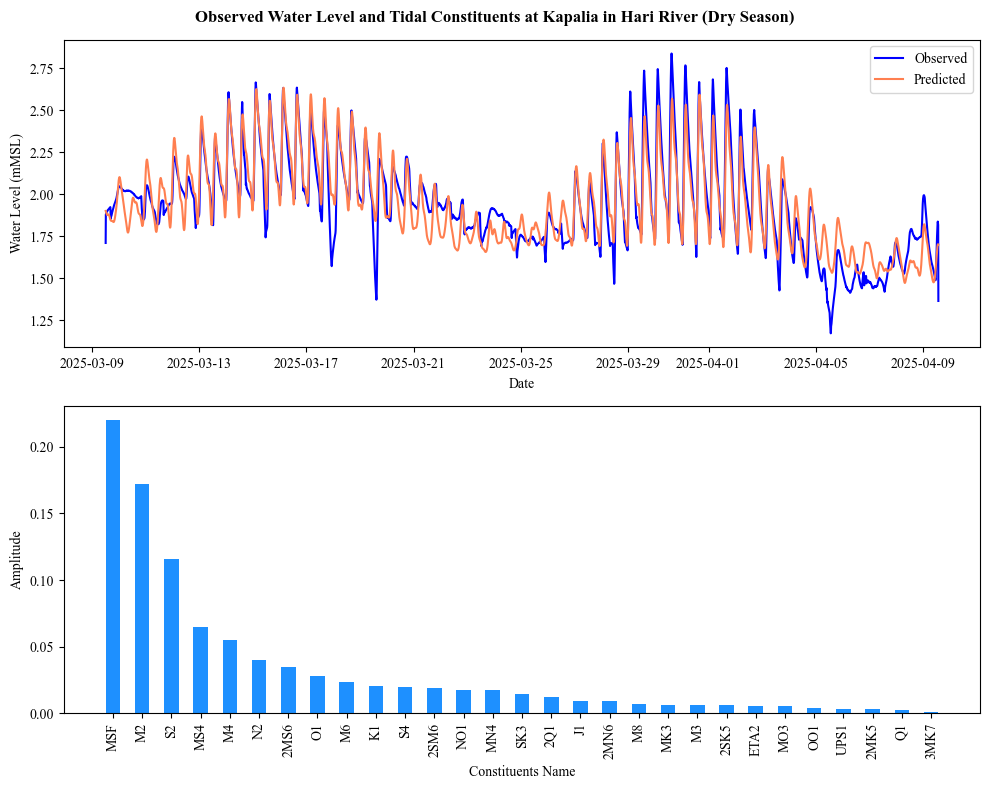

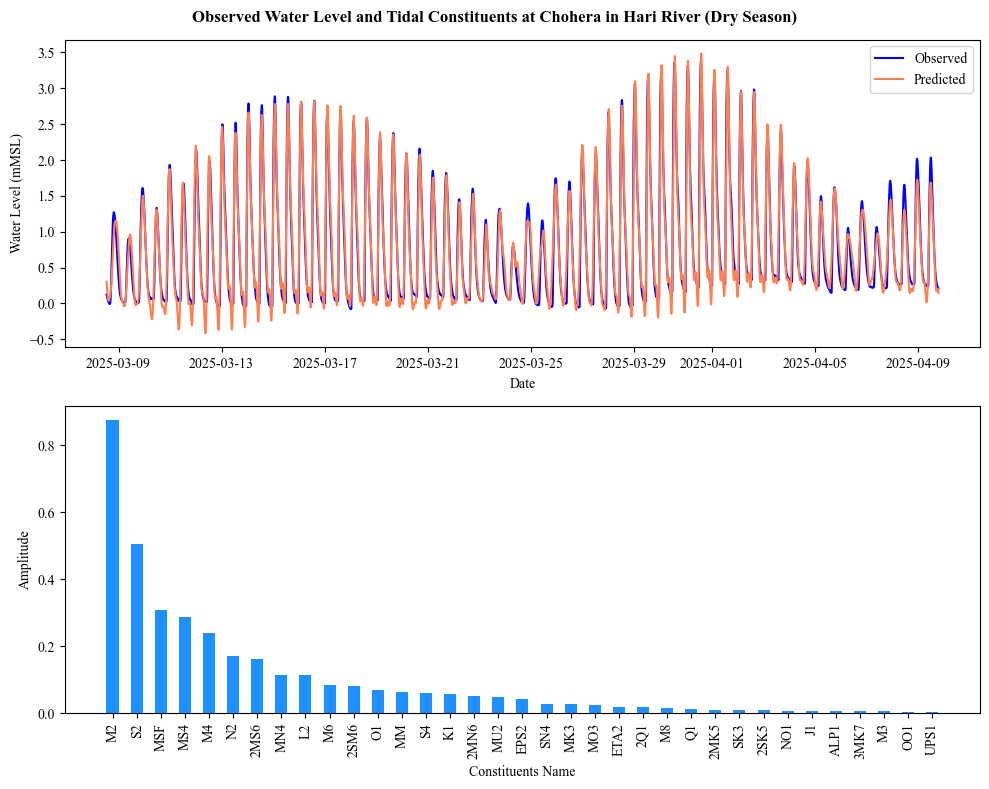

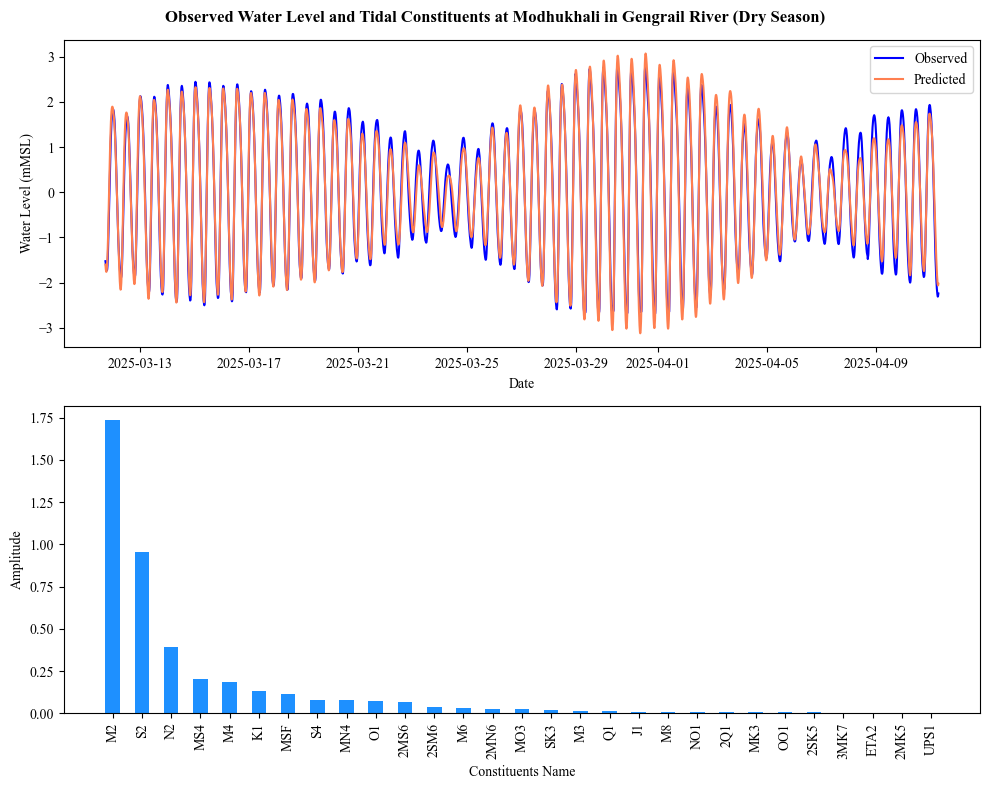

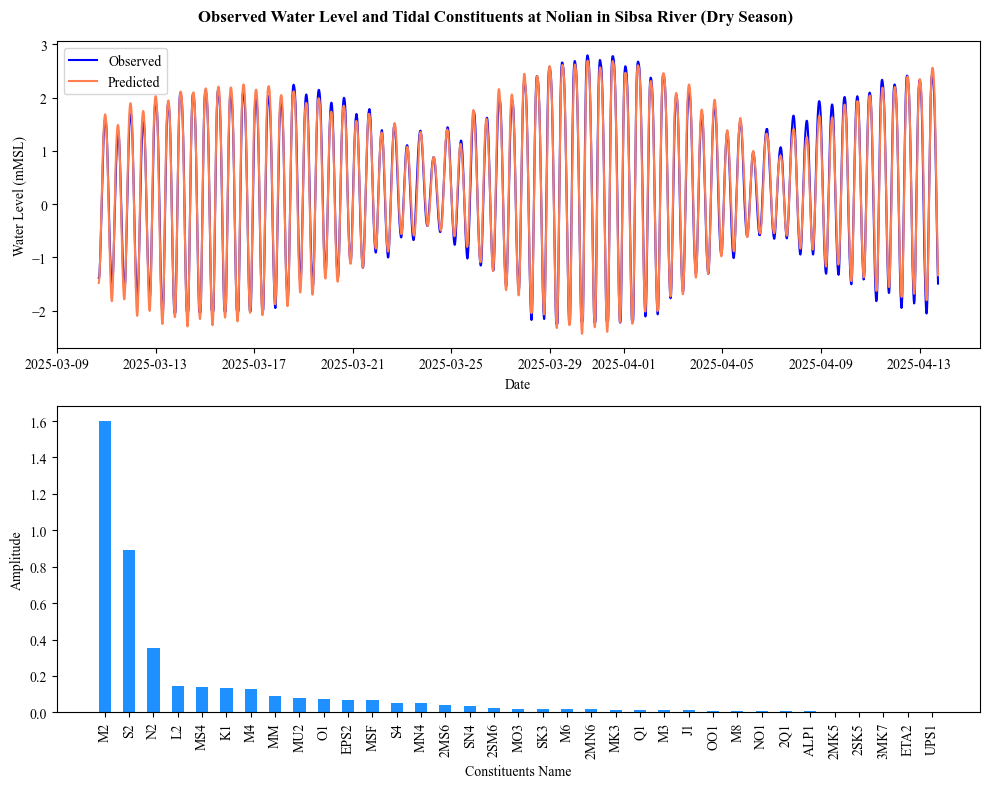

In [1]:
import pandas as pd
import numpy as np
import utide
import glob
import os
import matplotlib.pyplot as plt

station_lat = {'Kapalia':22.923268,
               'Chohera':22.847930,
               'Modhukhali': 22.655125,
               'Nolian':22.464781
               }

for file in glob.glob(r'Dry_Season_WL/*.xlsx'):

    file_path_list = file.split(os.sep)
    sl_no = file_path_list[-1].split('_')[0]
    river_name = file_path_list[-1].split('_')[1]
    station_name = file_path_list[-1].split('_')[2]
    
    df = pd.read_excel(file)
    
    time = df['Date_Time']
    wl = df['WL (mMSL)']
    
    coef = utide.solve(
        time,
        wl,
        lat= station_lat[station_name],
        method="ols",
        conf_int="MC",
        verbose=False,
    )
    
    constituent_df = pd.DataFrame({'Constituents': coef['name'], 'Amplitudes':coef['A'], 'Phase(°)':coef['g']})
    tide = utide.reconstruct(time, coef, verbose=False)
    
    font = {'family': 'Times New Roman',
            'weight': 'normal',
            'size': 10}
    
    plt.rc('font', **font)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    
    ax[0].plot(time, wl, label="Observed", color="blue")
    ax[0].plot(time, tide.h, label="Predicted", color="coral")
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Water Level (mMSL)')
    ax[0].legend()
    
    cons_name = coef['name']
    amplitudes = coef['A']
    
    ax[1].bar(cons_name, amplitudes, width=0.5, color = 'dodgerblue')
    ax[1].tick_params(axis='x', labelrotation=90)
    ax[1].set_xlabel('Constituents Name', size = 10, fontweight = 'normal')
    ax[1].set_ylabel('Amplitude', size = 10, fontweight = 'normal')
    
    fig.suptitle(f'Observed Water Level and Tidal Constituents at {station_name} in {river_name} River (Dry Season)', fontweight = 'bold')
    plt.tight_layout()
    
    fig.savefig(r"./Output (Dry Season)/WL_Analysis/{}_{}_{}_WL_Dry_Season_2025.jpg".format(sl_no, river_name, station_name), bbox_inches='tight', dpi=300)
    constituent_df.to_excel(r"./Output (Dry Season)/WL_Analysis/{}_{}_{}_Tidal_Constituents_Dry_Season_2025.xlsx".format(sl_no, river_name, station_name),
                            float_format = '%.4f', index=False)